In [1]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image_path = 'img_path'  # 이미지 경로를 지정하세요
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

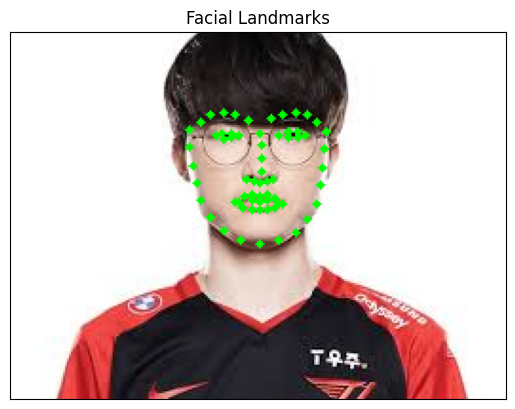

In [3]:
# 얼굴 검출
faces = detector(gray)
landmarks = []

for face in faces:
    shape = predictor(gray, face)
    for i in range(68):
        landmarks.append((shape.part(i).x, shape.part(i).y))

# 랜드마크를 numpy 배열로 변환
landmarks = np.array(landmarks)

# 랜드마크를 이미지에 그리기
for (x, y) in landmarks:
    cv2.circle(img, (x, y), 2, (0, 255, 0), -1)

# 이미지를 사용자에게 보여주기
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis

plt.title('Facial Landmarks')
plt.show()

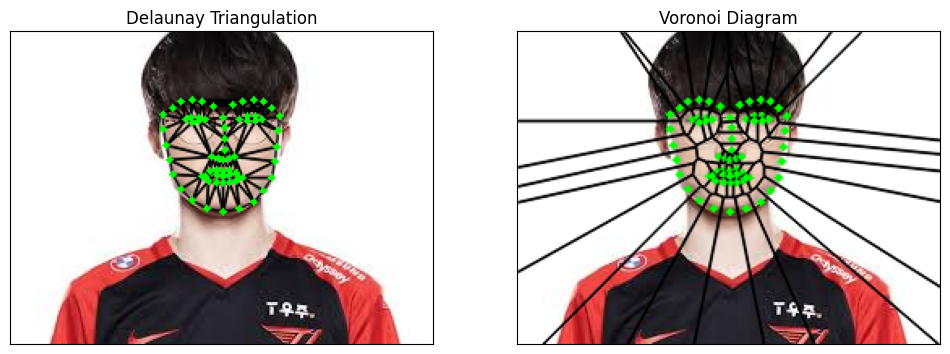

In [9]:
rect = (0, 0, img.shape[1], img.shape[0])
subdiv = cv2.Subdiv2D(rect)

# Insert landmarks into subdiv
for point in landmarks:
    subdiv.insert((float(point[0]), float(point[1])))

# Get Delaunay triangles
triangles = subdiv.getTriangleList()
triangles = np.array(triangles, dtype=np.int32)

# Draw Delaunay triangulation
delaunay_img = img.copy()
for t in triangles:
    pt1 = (t[0], t[1])
    pt2 = (t[2], t[3])
    pt3 = (t[4], t[5])
    cv2.line(delaunay_img, pt1, pt2, (0, 0, 0), 1, lineType=cv2.LINE_AA)
    cv2.line(delaunay_img, pt2, pt3, (0, 0, 0), 1, lineType=cv2.LINE_AA)
    cv2.line(delaunay_img, pt3, pt1, (0, 0, 0), 1, lineType=cv2.LINE_AA)

for point in landmarks:
    cv2.circle(delaunay_img, (int(point[0]), int(point[1])), 2, (0, 255, 0), -1)

# Get Voronoi diagram
(facets, centers) = subdiv.getVoronoiFacetList([])

voronoi_img = img.copy()
for i in range(len(facets)):
    ifacet_arr = []
    for f in facets[i]:
        ifacet_arr.append(f)

    ifacet = np.array(ifacet_arr, np.int32)
    ifacets = np.array([ifacet])
    cv2.polylines(voronoi_img, ifacets, True, (0, 0, 0), 1, lineType=cv2.LINE_AA)
    cv2.circle(voronoi_img, (int(centers[i][0]), int(centers[i][1])), 2, (0, 255, 0), thickness=-1, lineType=cv2.LINE_AA)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot Delaunay triangulation
axs[0].imshow(cv2.cvtColor(delaunay_img, cv2.COLOR_BGR2RGB))
axs[0].set_title('Delaunay Triangulation')
axs[0].set_xticks([])
axs[0].set_yticks([])

# Plot Voronoi diagram
axs[1].imshow(cv2.cvtColor(voronoi_img, cv2.COLOR_BGR2RGB))
axs[1].set_title('Voronoi Diagram')
axs[1].set_xticks([])
axs[1].set_yticks([])

plt.show()

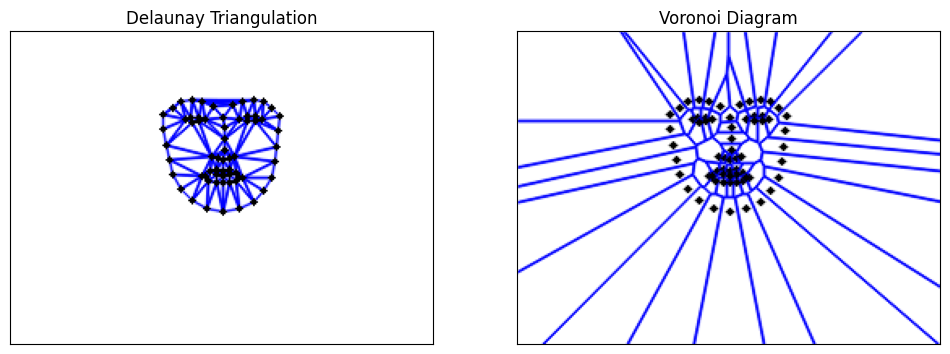

In [5]:
rect = (0, 0, img.shape[1], img.shape[0])
subdiv = cv2.Subdiv2D(rect)

# Insert landmarks into subdiv
for point in landmarks:
    subdiv.insert((float(point[0]), float(point[1])))

# Get Delaunay triangles
triangles = subdiv.getTriangleList()
triangles = np.array(triangles, dtype=np.int32)

# Create blank images for Delaunay and Voronoi diagrams
delaunay_img = np.ones_like(img) * 255
voronoi_img = np.ones_like(img) * 255

# Draw Delaunay triangulation
for t in triangles:
    pt1 = (t[0], t[1])
    pt2 = (t[2], t[3])
    pt3 = (t[4], t[5])
    cv2.line(delaunay_img, pt1, pt2, (255, 0, 0), 1, lineType=cv2.LINE_AA)
    cv2.line(delaunay_img, pt2, pt3, (255, 0, 0), 1, lineType=cv2.LINE_AA)
    cv2.line(delaunay_img, pt3, pt1, (255, 0, 0), 1, lineType=cv2.LINE_AA)

for point in landmarks:
    cv2.circle(delaunay_img, (int(point[0]), int(point[1])), 2, (0, 0, 0), -1)

# Get Voronoi diagram
(facets, centers) = subdiv.getVoronoiFacetList([])

for i in range(len(facets)):
    ifacet_arr = []
    for f in facets[i]:
        ifacet_arr.append(f)

    ifacet = np.array(ifacet_arr, np.int32)
    ifacets = np.array([ifacet])
    cv2.polylines(voronoi_img, ifacets, True, (255, 0, 0), 1, lineType=cv2.LINE_AA)
    cv2.circle(voronoi_img, (int(centers[i][0]), int(centers[i][1])), 2, (0, 0, 0), thickness=-1, lineType=cv2.LINE_AA)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot Delaunay triangulation
axs[0].imshow(cv2.cvtColor(delaunay_img, cv2.COLOR_BGR2RGB))
axs[0].set_title('Delaunay Triangulation')
axs[0].set_xticks([])
axs[0].set_yticks([])

# Plot Voronoi diagram
axs[1].imshow(cv2.cvtColor(voronoi_img, cv2.COLOR_BGR2RGB))
axs[1].set_title('Voronoi Diagram')
axs[1].set_xticks([])
axs[1].set_yticks([])

plt.show()